# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [5]:
print(weather_api_key)

dac3859238616b097b1b85e9f72062cf


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_df = requests.get(city_url).json()
        city_weather_df

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_df['coord']["lat"]
        city_lng = city_weather_df['coord']["lon"]
        city_max_temp = city_weather_df["main"]["temp_max"]
        city_humidity = city_weather_df["main"]["humidity"]
        city_clouds = city_weather_df["clouds"]["all"]
        city_wind = city_weather_df["wind"]["speed"]
        city_country = city_weather_df["sys"]["country"]
        city_date = city_weather_df["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | miranorte
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | straumen
Processing Record 4 of Set 1 | tokur
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | zaqatala
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | nizhneyans

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,59.97,89,9,3.22,AU,1676585585
1,straumen,63.8709,11.2999,32.00,88,100,6.08,NO,1676585683
2,tokur,53.1333,132.9000,-26.23,100,97,3.18,RU,1676585684
3,saint george,37.1041,-113.5841,44.26,27,0,4.00,US,1676585438
4,yellowknife,62.4560,-114.3525,-4.43,95,100,8.68,CA,1676585684


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../solution/cities1.csv", index_label="City_ID")


In [11]:
# Read saved data
city_data_df.to_csv("../solution/cities1.csv", index_label="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,59.97,89,9,3.22,AU,1676585585
1,straumen,63.8709,11.2999,32.00,88,100,6.08,NO,1676585683
2,tokur,53.1333,132.9000,-26.23,100,97,3.18,RU,1676585684
3,saint george,37.1041,-113.5841,44.26,27,0,4.00,US,1676585438
4,yellowknife,62.4560,-114.3525,-4.43,95,100,8.68,CA,1676585684


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

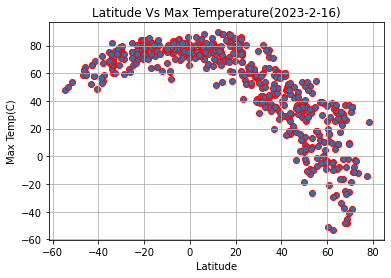

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="red")


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp(C)")
plt.title("Latitude Vs Max Temperature(2023-2-16)")

# Save the figure
plt.savefig("../solution/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

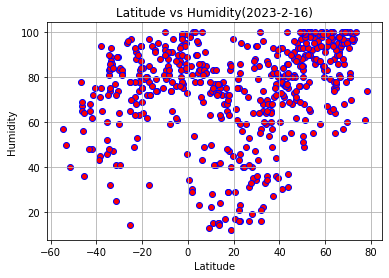

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],color="Red",edgecolors="blue")


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity(2023-2-16)")
# Save the figure
plt.savefig("../solution/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

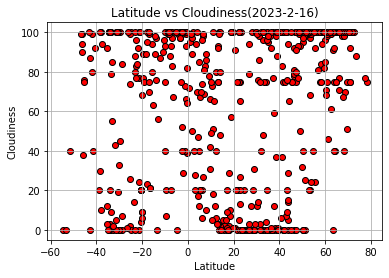

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],color="Red",edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness(2023-2-16)")

# Save the figure
plt.savefig("../solution/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

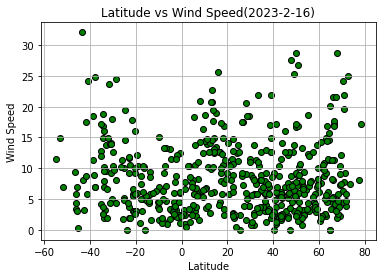

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],color="green",edgecolors="black")


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed(2023-2-16)")

# Save the figure
plt.savefig("../solution/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,59.97,89,9,3.22,AU,1676585585
5,mataura,-46.1927,168.8643,58.48,67,99,3.44,NZ,1676585684
6,ushuaia,-54.8000,-68.3000,47.86,57,0,11.50,AR,1676585685
7,castro,-24.7911,-50.0119,65.82,97,100,14.65,BR,1676585685
8,bredasdorp,-34.5322,20.0403,67.73,81,100,16.87,ZA,1676585686


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,59.97,89,9,3.22,AU,1676585585
5,mataura,-46.1927,168.8643,58.48,67,99,3.44,NZ,1676585684
6,ushuaia,-54.8000,-68.3000,47.86,57,0,11.50,AR,1676585685
7,castro,-24.7911,-50.0119,65.82,97,100,14.65,BR,1676585685
8,bredasdorp,-34.5322,20.0403,67.73,81,100,16.87,ZA,1676585686


###  Temperature vs. Latitude Linear Regression Plot

r value is 0.6062280165429625


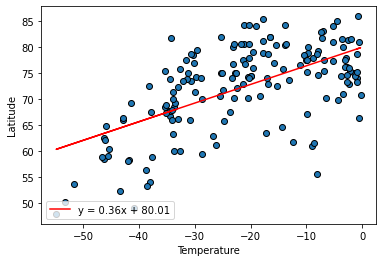

In [29]:
# Linear regression on Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"Temperature","Latitude")


r value is 0.6062280165429625


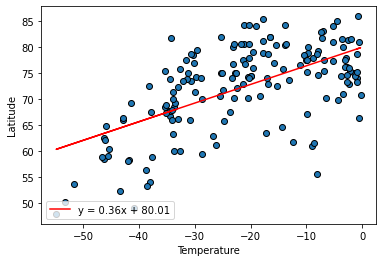

In [30]:
# Linear regression on Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Temperature","Latitude")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r value is 0.44550368837255605


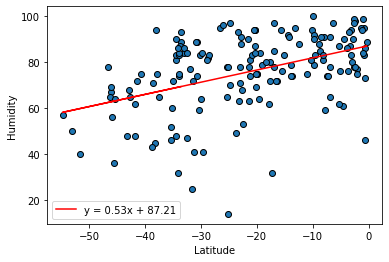

In [31]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"Latitude","Humidity")


r value is 0.44550368837255605


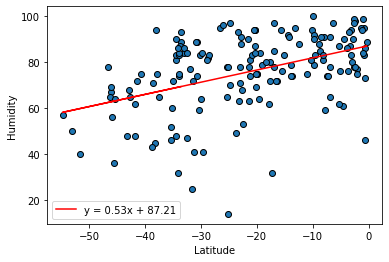

In [32]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r value is 0.2696186012490216


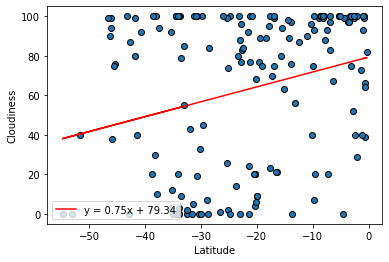

In [33]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"Latitude","Cloudiness")


r value is 0.2696186012490216


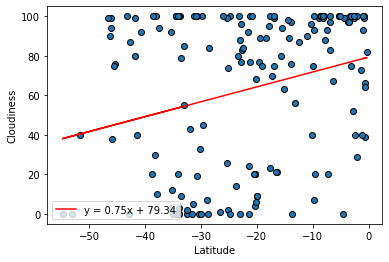

In [34]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r value is -0.3591370289383187


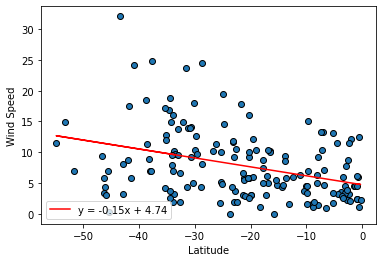

In [35]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"Latitude","Wind Speed")


r value is -0.3591370289383187


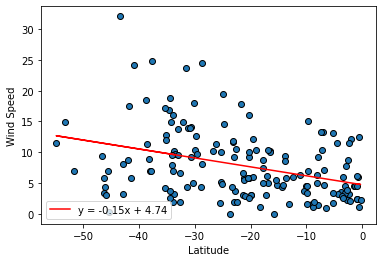

In [36]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed")


**Discussion about the linear relationship:** YOUR RESPONSE HERE